Cada línea es una búsqueda, contar elementos para ver busquédas

In [1]:
#importar pandas y numpy y matplot y  quede embebido  el notebook

import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
b = pd.read_csv('searches.csv.bz2',
                sep='^', 
                nrows=1e5,
                usecols=['Date','Destination'],
                parse_dates=['Date']
               )

In [16]:
b.columns

Index([u'Date', u'Destination'], dtype='object')

In [17]:
b.sample(5)

,Date,Destination
65584,2013-03-07,MLA
90334,2013-04-01,RUN
7652,2013-01-08,NAP
70576,2013-03-12,BOM
42406,2013-02-12,PLS


In [18]:
x =b.Date[1]

In [20]:
x.month

1

In [21]:
b.count()

Date           100000
Destination    100000
dtype: int64

In [28]:
#opción crear función 
def dateToMonth (b):
    return b.month

m = b.Date.apply(dateToMonth)

In [ ]:
# opción nuestra apañada
lista []
for i in b.Date:
    lista.append(i.month)
    
b['Month'] = lista

In [30]:
#opción lambda: función anonima y temporal 

m = b.Date.apply(lambda b: b.month)

In [31]:
b ['Month'] = m

In [32]:
b.head()

,Date,Destination,Month
0,2013-01-01,AUH,1
1,2013-01-01,MIL,1
2,2013-01-01,SFO,1
3,2013-01-01,ARN,1
4,2013-01-01,MAD,1


In [36]:
#seleccionar columnas y filas usamos [], creamos indice --> lista [] y elementos()

i = b.Destination.isin(['MAD','BCN','AGP'])

In [38]:
#resultado falso, falso, verdadero --> indice 
i.head(5)

0    False
1    False
2    False
3    False
4     True
Name: Destination, dtype: bool

In [40]:
#filtrar los elementos que interesan

filtrado = b[i]

In [41]:
filtrado.head()

,Date,Destination,Month
4,2013-01-01,MAD,1
93,2013-01-01,AGP,1
113,2013-01-01,BCN,1
147,2013-01-01,AGP,1
151,2013-01-01,MAD,1


In [42]:
b.count()

Date           100000
Destination    100000
Month          100000
dtype: int64

In [43]:
filtrado.count()

Date           3663
Destination    3663
Month          3663
dtype: int64

In [50]:
#filtrado es una dataframe más pequeño, ahora agrupar para dibujar

filtrado2 = filtrado.groupby(['Destination', 'Month']).count()

In [51]:
filtrado2.head()

Date
Destination Month      
AGP         1       169
            2       147
            3       187
            4        31
BCN         1       517

In [52]:
#más mono  --> para hacer utilizar el index como valor
filtrado3 = filtrado2.reset_index()

In [54]:
filtrado3.head()

,Destination,Month,Date
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,31
4,BCN,1,517


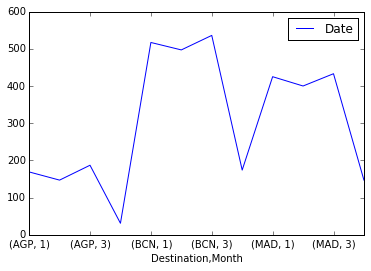

In [56]:
#usa indice como variable horizontal y las columnas como variables --> necesito el indice mes y tener 3 columnas (MAd, Bac) --> para que me dibuje 3 líneas
filtrado2.plot() 

In [71]:
#1era columna eje x, la segunda columna es la variable, la tercera es y

filtrado4 = filtrado3.pivot('Month','Destination','Date')

In [68]:
filtrado3.head()

,Destination,Month,Date
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,31
4,BCN,1,517


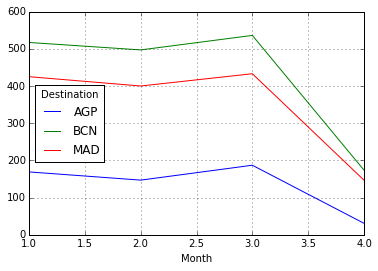

In [73]:
#ojo está interpolado y creá 1,5, 2,5 ...

filtrado4.plot(grid=True)